In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#import functools

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv", sep=";", encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12358 entries, 0 to 12357
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome_munic    12358 non-null  object 
 1   codigo_ibge   12358 non-null  int64  
 2   dia           12358 non-null  int64  
 3   mes           12358 non-null  int64  
 4   datahora      12358 non-null  object 
 5   casos         12358 non-null  int64  
 6   casos_novos   11891 non-null  float64
 7   casos_pc      12358 non-null  object 
 8   casos_mm7d    12352 non-null  object 
 9   obitos        12358 non-null  int64  
 10  obitos_novos  11891 non-null  float64
 11  obitos_pc     12358 non-null  object 
 12  obitos_mm7d   12352 non-null  object 
 13  letalidade    12358 non-null  object 
 14  nome_ra       12358 non-null  object 
 15  cod_ra        12358 non-null  int64  
 16  nome_drs      12358 non-null  object 
 17  cod_drs       12358 non-null  int64  
 18  pop           12358 non-nu

In [4]:
df


,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude
0,Arujá,3503901,26,3,2020-03-26,1,NaN,"1,1142806",NaN,0,...,10,Grande São Paulo,10,89744,10776,9617,<10,7,-23.3965,-46.3200
1,Barueri,3505708,26,3,2020-03-26,3,NaN,"1,1346874",NaN,0,...,10,Grande São Paulo,10,264390,29409,657,<10,7,-23.5057,-46.8790
2,Caieiras,3509007,26,3,2020-03-26,2,NaN,"1,9878345",NaN,0,...,10,Grande São Paulo,10,100612,12059,9764,<10,7,-23.3607,-46.7397
3,Campinas,3509502,26,3,2020-03-26,4,NaN,"0,3402804",NaN,0,...,4,Campinas,3,1175501,192796,79457,<10,7,-22.9053,-47.0659
4,Carapicuíba,3510609,26,3,2020-03-26,2,NaN,"0,5068449",NaN,0,...,10,Grande São Paulo,10,394598,50996,3455,<10,7,-23.5235,-46.8407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12353,Vinhedo,3556701,16,5,2020-05-16,56,4.0,"72,2384902","29,5714286",2,...,4,Campinas,3,77521,11665,816,<75,4,-23.0302,-46.9833
12354,Viradouro,3556800,16,5,2020-05-16,1,0.0,"5,4504824","20,7142857",1,...,2,Barretos,16,18347,2985,21773,<10,7,-20.8734,-48.2930
12355,Vista Alegre do Alto,3556909,16,5,2020-05-16,1,0.0,"12,4781632","20,1428571",0,...,2,Barretos,16,8014,1107,9543,<10,7,-21.1692,-48.6284
12356,Votorantim,3557006,16,5,2020-05-16,50,2.0,"41,7278675","27,1428571",3,...,13,Sorocaba,6,119824,16378,18352,<75,4,-23.5446,-47.4388


In [13]:
def dados(cidade):
    filt=df['nome_munic'] == cidade
    pop=df[filt]['pop'].tolist()
    print("População:" + str(pop[0]))

    x=df[filt]['obitos'].tolist()
    total = df[filt]['obitos'].tolist()
    print("Total de obitos:" + str(total[len(total)-1]))
    print("Índice (óbitos em cada 1000):"+ str(total[len(total)-1]/pop[0]*1000))
    plt.title(cidade)
    plt.plot(x, label='Óbitos')
    plt.grid()
    #
    x=df[filt]['casos'].tolist()
    total = df[filt]['casos'].tolist()
    print("Total de casos:" + str(total[len(total)-1]))
    print("Índice (casos por mil):"+ str(total[len(total)-1]/pop[0]*1000))
    plt.title(cidade)
    plt.plot(x, label='Casos acumulados')
    plt.grid()
    #
    x=df[filt]['casos_novos'].tolist()
    plt.plot(x, label="Casos Novos por dia")
    print("Casos hoje:" + str(x[len(x)-1]))
    plt.grid()
    plt.legend()


População:11869660
Total de obitos:2792
Índice (óbitos em cada 1000):0.23522156489739388
Total de casos:35429
Índice (casos por mil):2.9848369708989138
Casos hoje:1437.0


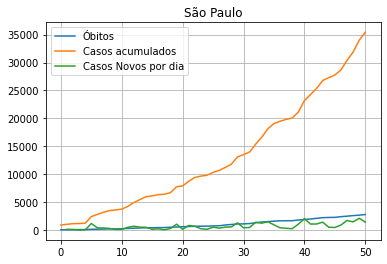

In [15]:
dados("São Paulo")

População:389873
Total de obitos:17
Índice (óbitos):4.360394282240627e-05
Total de casos:216
Índice (casos por mil):0.554026567625868
Casos hoje:2.0


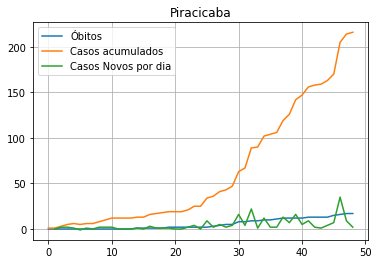

In [12]:
dados("Piracicaba")

População:1175501
Total de obitos:35
Índice (óbitos):2.9774538686058115e-05
Total de casos:946
Índice (casos):0.0008047632456288851
Casos hoje:106.0


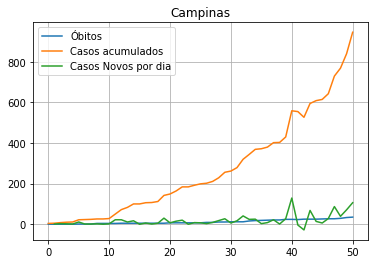

In [8]:
dados("Campinas")

População:428703
Total de obitos:81
Índice (óbitos):0.00018894199480759408
Total de casos:1323
Índice (casos):0.0030860525818573697
Casos hoje:72.0


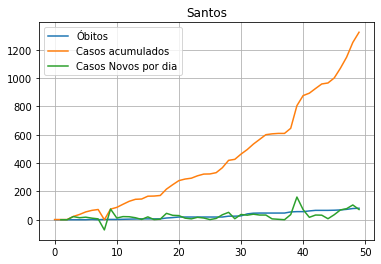

In [9]:
dados("Santos")

População:693867
Total de obitos:67
Índice (óbitos):9.656029181384906e-05
Total de casos:1286
Índice (casos):0.0018533811234717893
Casos hoje:62.0


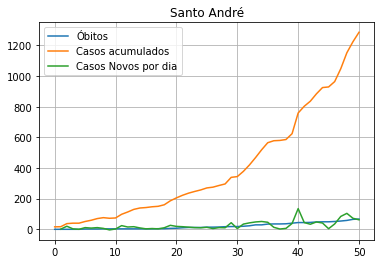

In [10]:
dados("Santo André")

População:283212
Total de obitos:3
Índice (óbitos):1.0592771492733359e-05
Total de casos:107
Índice (casos):0.0003778088499074898
Casos hoje:9.0


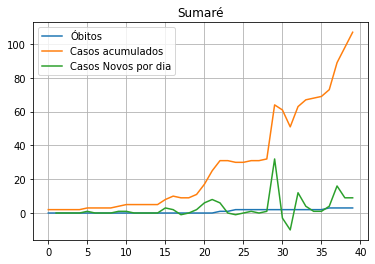

In [11]:
dados("Sumaré")

População:230268
Total de obitos:13
Índice (óbitos):5.64559556690465e-05
Total de casos:105
Índice (casos):0.0004559904111730679
Casos hoje:10.0


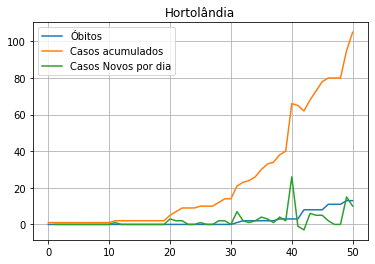

In [12]:
dados("Hortolândia")

População:233458
Total de obitos:4
Índice (óbitos):1.713370285019147e-05
Total de casos:66
Índice (casos):0.00028270609702815924
Casos hoje:2.0


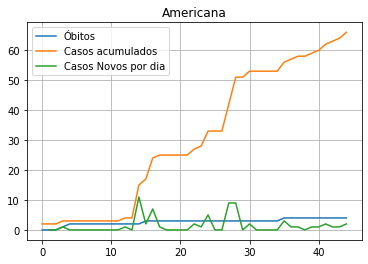

In [80]:
dados("Americana")

População:658547
Total de obitos:29
Índice (óbitos):4.403634061046516e-05
Total de casos:418
Índice (casos):0.0006347307025922219
Casos hoje:25.0


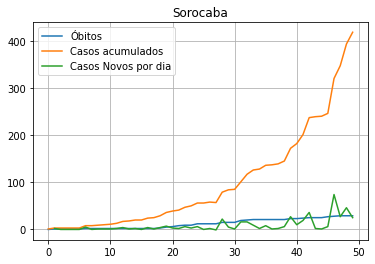

In [16]:
dados("Sorocaba")

População:683777
Total de obitos:13
Índice (óbitos):1.901204632504457e-05
Total de casos:436
Índice (casos):0.0006376347844399563
Casos hoje:32.0


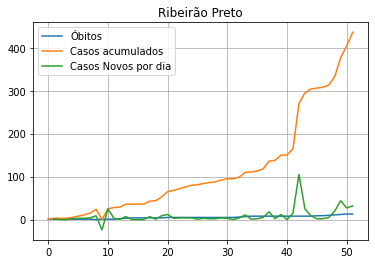

In [17]:
dados("Ribeirão Preto")

População:428703
Total de obitos:81
Índice (óbitos):0.00018894199480759408
Total de casos:1323
Índice (casos):0.0030860525818573697
Casos hoje:72.0


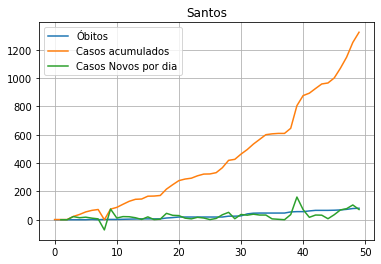

In [6]:
dados("Santos")